# Correlation analysis

In this notebook we study the correlation between the burned area during the fire season's months and some climate indexes for each pixel.

First, we consider the correlation between the sum of the burned area of the fire season's months and the average of the indexes in these months. We apply that to the unimodal fire seasons and then to the main fire season of the bimodal fire seasons.

Finally, we have a look to the correlation month by month. In other words, we study correlation between burned area of each fire season's month and the value of the indexes in this month.

We consider the following climate indexes: NAO, EA, WP, EP/NP, PNA, EA/WR, SCAND, POL, NINO3.4, ONI, SOI, but at the end we do not use NIÑO3.4, ONI and EP/NP.

We use the functions defined in the file *correlation_functions.R*

In [1]:
setwd("..")
source("scripts/correlation_functions.R")

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

Loading required package: RColorBrewer


Loading objects:
  coast.lines
Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  fireSeasonMedian_def


## Data loading

We check that all the indexes have been standarised used the period between 1981 and 2010. NINA34 and ONI have not, so we standarise them.

In [2]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

In [3]:
oni = read.table("CPC/oni.data", skip = 1, nrows = 72, 
                    col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
oni[,-1] = (oni[,-1] - mean(as.matrix(oni[32:61,-1]))) / sd(as.matrix(oni[32:61,-1]))

In [4]:
nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(nao[32:61,-1]))
sd(as.matrix(nao[32:61,-1]))

[1] 8.333333e-05

[1] 1.001653

In [5]:
poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(poleur[32:61,-1]))
sd(as.matrix(poleur[32:61,-1]))

[1] 0.0001388889

[1] 1.001456

In [6]:
ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)

ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(ea[32:61,-1]))
sd(as.matrix(ea[32:61,-1]))

[1] -0.0001388889

[1] 1.001423

In [7]:
eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(eawr[32:61,-1]))
sd(as.matrix(eawr[32:61,-1]))

[1] -0.0001666667

[1] 1.001118

In [8]:
# falta dec
epnp = read.table("CPC/epnp_index.tim.txt", skip = 8, header = T)
epnp <- epnp %>% spread(MONTH,INDEX)
colnames(epnp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(epnp[32:61,-c(1,13)]))
sd(as.matrix(epnp[32:61,-c(1,13)]))

[1] 0.0002121212

[1] 1.00141

In [9]:
pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(pna[32:61,-1]))
sd(as.matrix(pna[32:61,-1]))

[1] 0.0003333333

[1] 1.001209

In [10]:
scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(scand[32:61,-1]))
sd(as.matrix(scand[32:61,-1]))

[1] 2.777778e-05

[1] 1.001176

In [11]:
soi = read.table("CPC/soi.txt", skip = 88, ,nrows = 70,
                 col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
mean(as.matrix(soi[31:60,-1]))
sd(as.matrix(soi[31:60,-1]))

[1] 0.001388889

[1] 1.000069

In [12]:
wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(wp[32:61,-1]))
sd(as.matrix(wp[32:61,-1]))

[1] 0.0003055556

[1] 1.001415

Warning message:
"package 'psych' was built under R version 3.6.3"

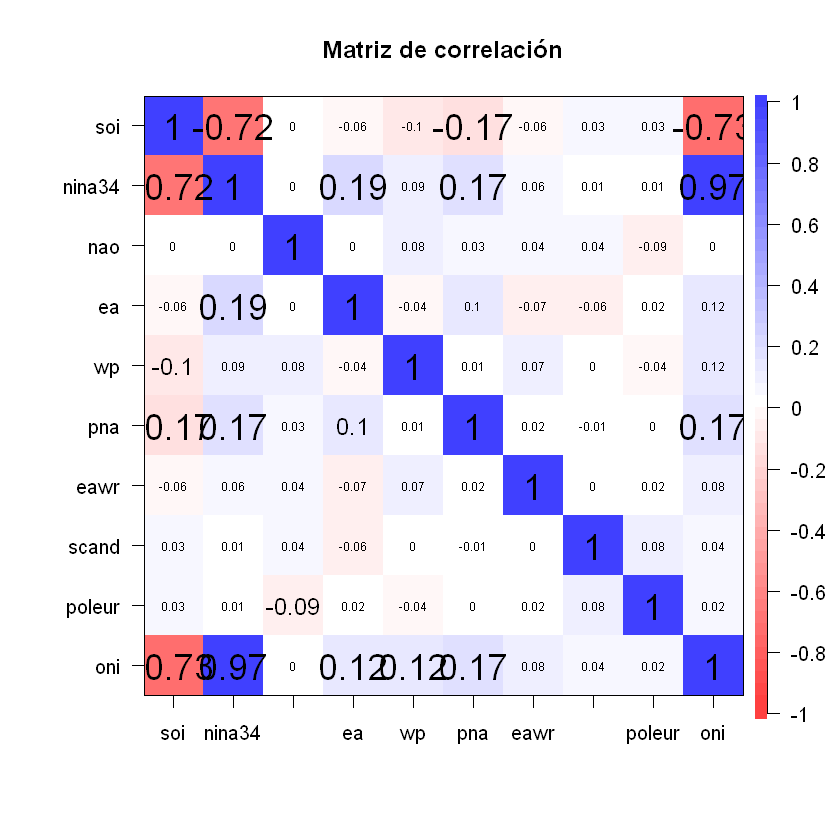

In [13]:
l = list(nina34, nao, ea, wp, pna, eawr, scand, poleur, oni)
M = as.vector(t(as.matrix(soi[1:70,-1])))
for (i in 1:9){
    M = cbind(M, as.vector(t(as.matrix(l[[i]][2:71,-1]))))
}

library(psych)
colnames(M) = c('soi', 'nina34', 'nao', 'ea', 'wp', 'pna', 'eawr', 'scand', 'poleur', 'oni')
corPlot(M, cex = 1.2, main = "Matriz de correlación")

SOI, ONI and NINA34 are strongly correlated. Consequently, we only use the SOI index.

## Annual correlations for the unimodal fire seasons

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

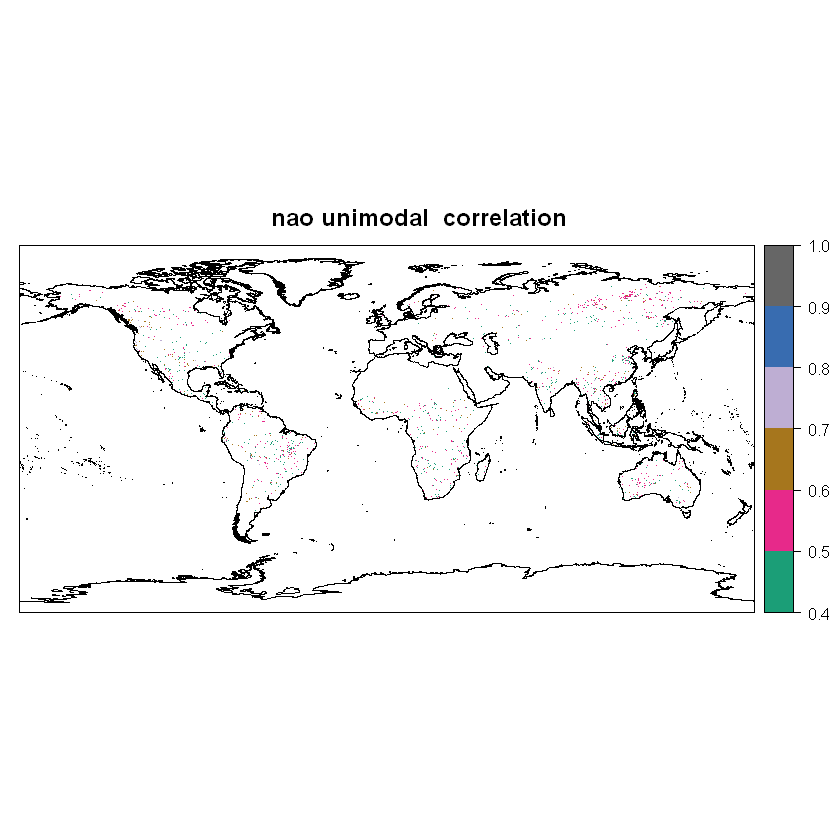

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

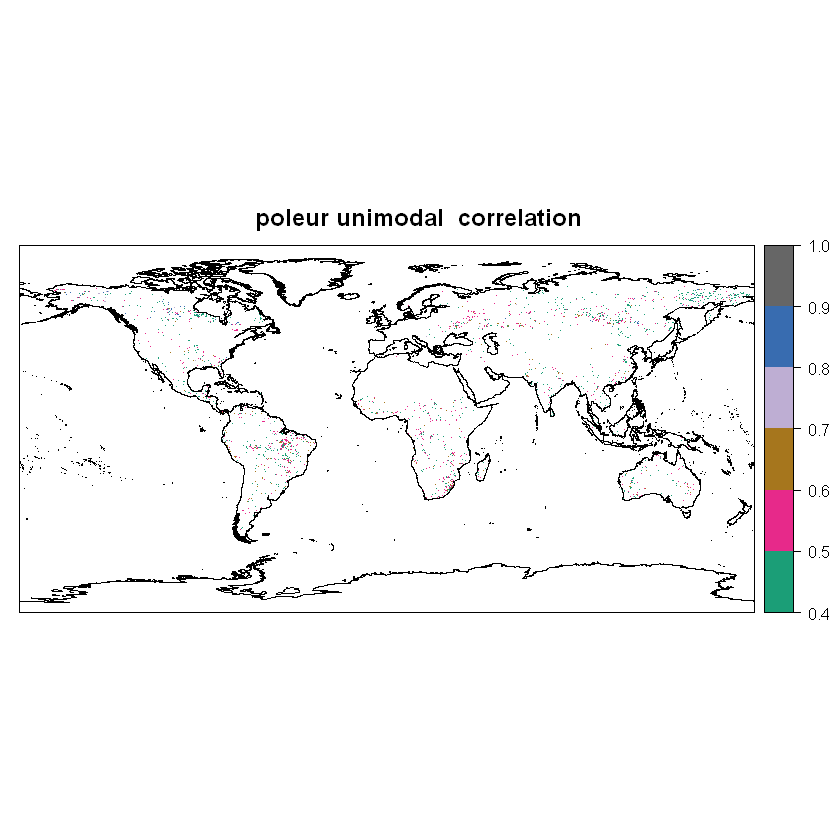

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

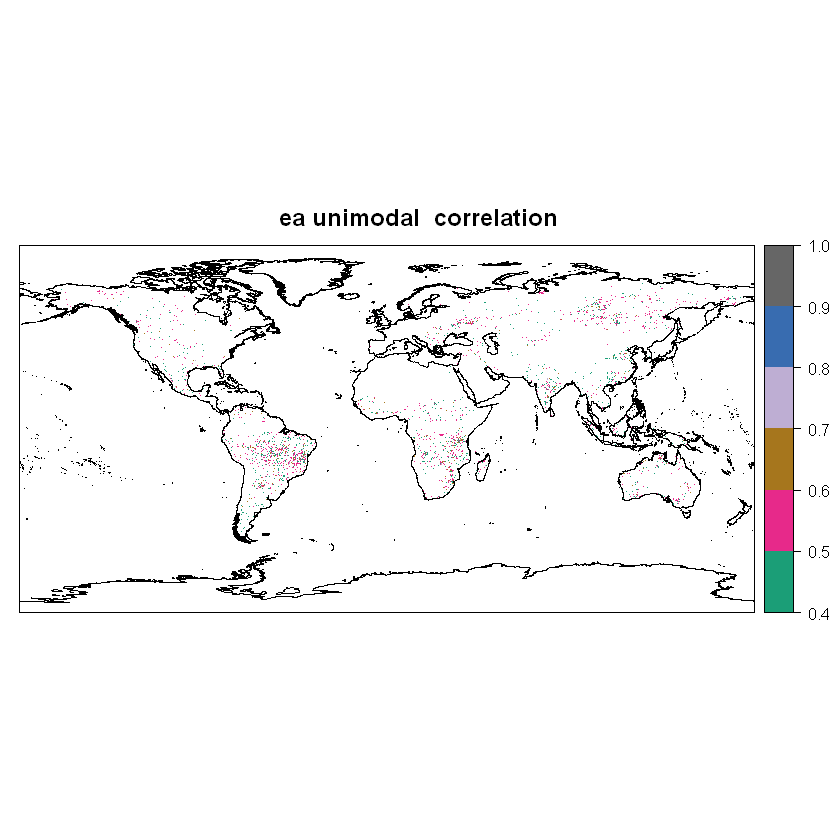

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

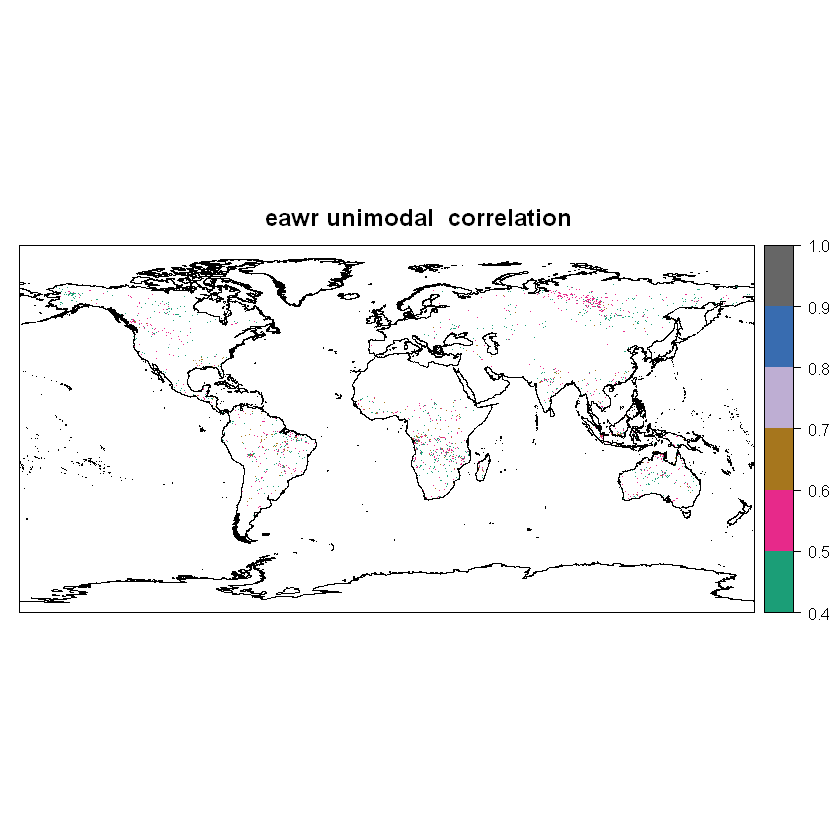

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

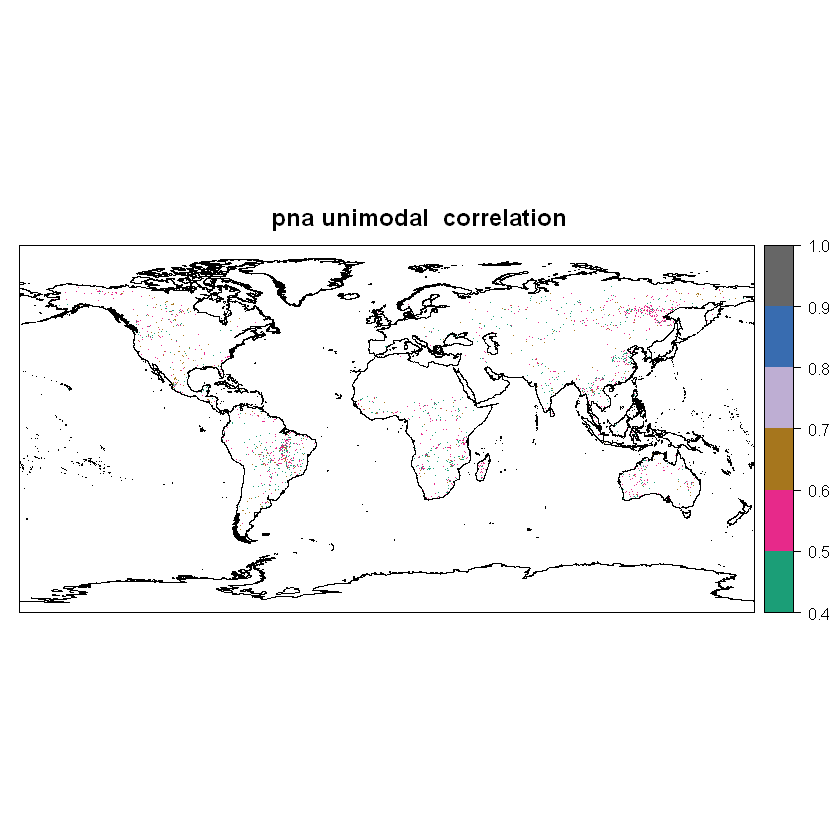

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

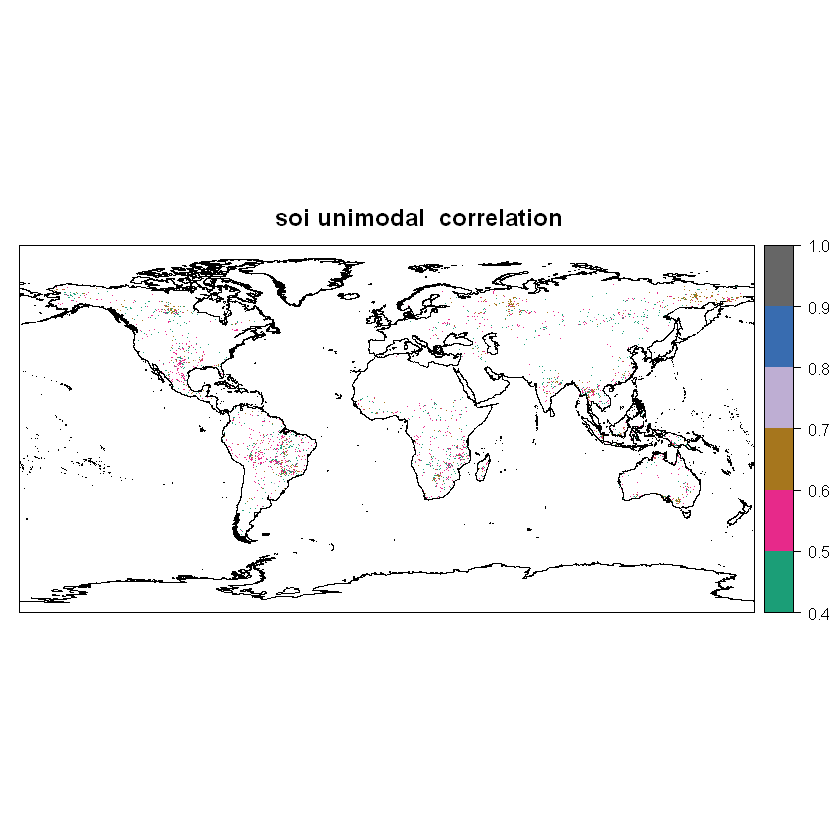

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

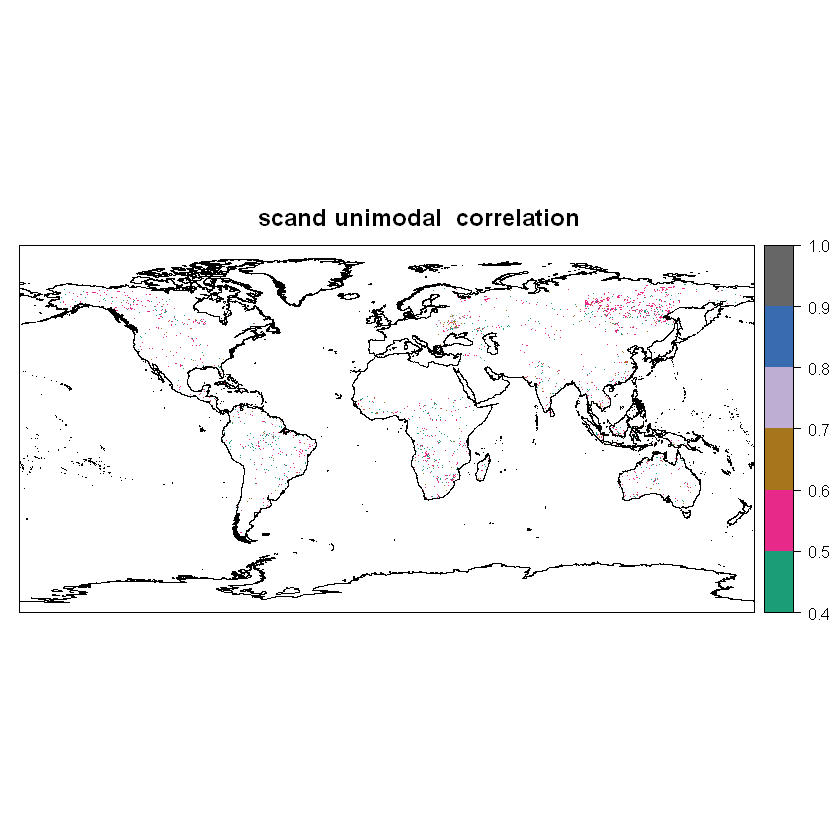

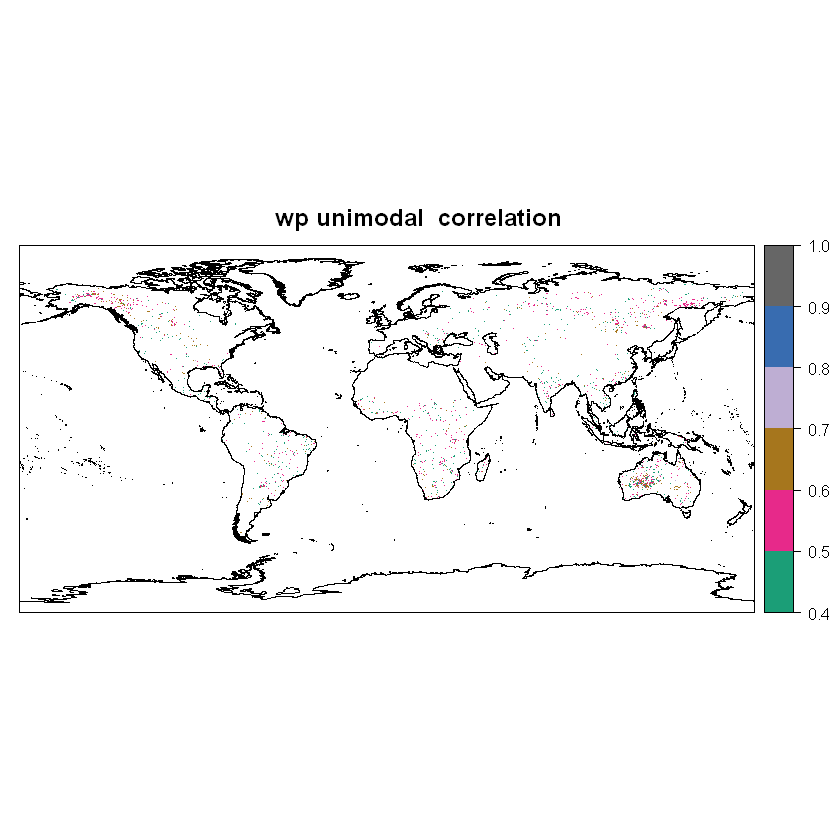

In [14]:
corr.df = masked_coords
#corr.df = corr.annual(nina34, 'nina34', corr.df, mode = 'unimodal')
#corr.df = corr.annual(oni, 'oni', corr.df, mode = 'unimodal')
corr.df = corr.annual(nao, 'nao', corr.df, mode = 'unimodal')
corr.df = corr.annual(poleur, 'poleur', corr.df, mode = 'unimodal')
corr.df = corr.annual(ea, 'ea', corr.df, mode = 'unimodal')
corr.df = corr.annual(eawr, 'eawr', corr.df, mode = 'unimodal')
#corr.df = corr.annual(epnp, 'epnp', corr.df, mode = 'unimodal')
corr.df = corr.annual(pna, 'pna', corr.df, mode = 'unimodal')
corr.df = corr.annual(soi, 'soi', corr.df, mode = 'unimodal')
corr.df = corr.annual(scand, 'scand', corr.df, mode = 'unimodal')
corr.df = corr.annual(wp, 'wp', corr.df, mode = 'unimodal')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  13988 
Number of pixels correlated with more than  1  indexes  1596 
Number of pixels correlated with more than  2  indexes  98 
Number of pixels correlated with more than  3  indexes  41 
Number of pixels correlated with more than  4  indexes  41 
Number of pixels correlated with more than  5  indexes  41 
Number of pixels correlated with more than  6  indexes  41 
Number of pixels correlated with more than  7  indexes  39 


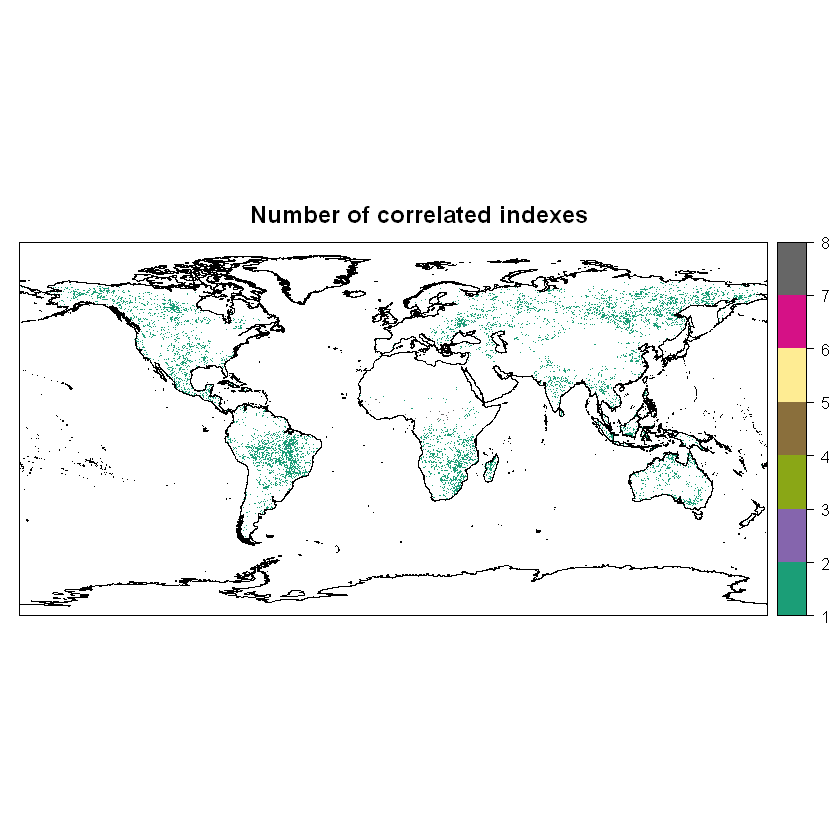

In [15]:
threshold = 0.4

arg.list <- list(col.regions = group.colors(8),
                          at = seq(1, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df$nao > threshold), as.numeric(corr.df$poleur > threshold), as.numeric(corr.df$ea > threshold),
          as.numeric(corr.df$eawr > threshold), as.numeric(corr.df$pna > threshold), as.numeric(corr.df$soi > threshold), 
          as.numeric(corr.df$scand > threshold), as.numeric(corr.df$wp > threshold))

corr.df$suma = rowSums(v, na.rm=T)
v <- corr.df$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df$suma > i-1), '\n')
}

## Annual correlations for the main fire seasons of the bimodal fire seasons

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

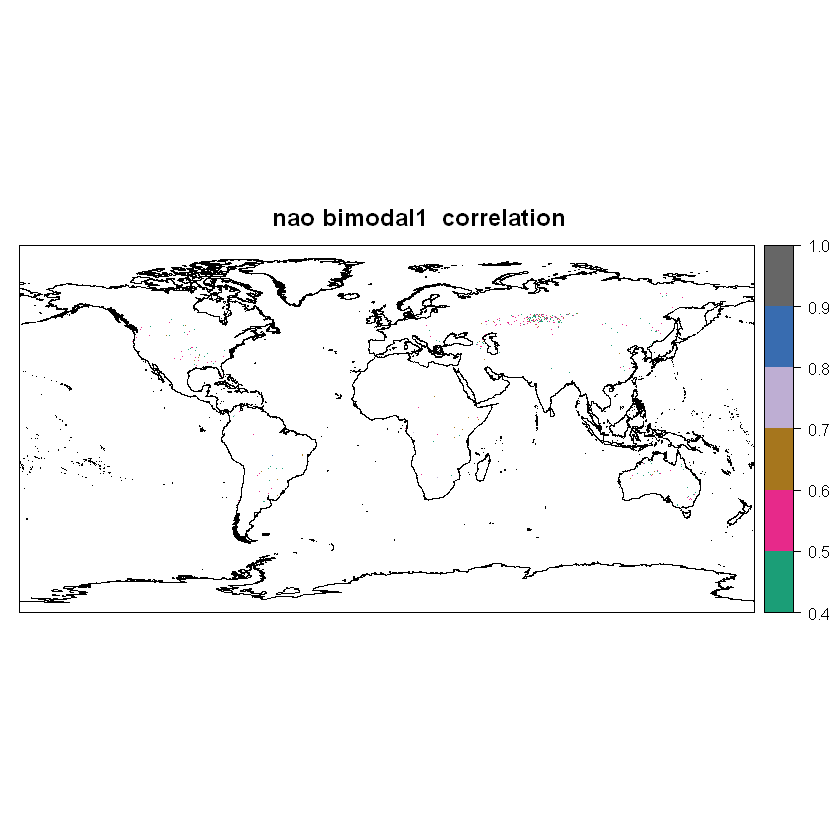

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

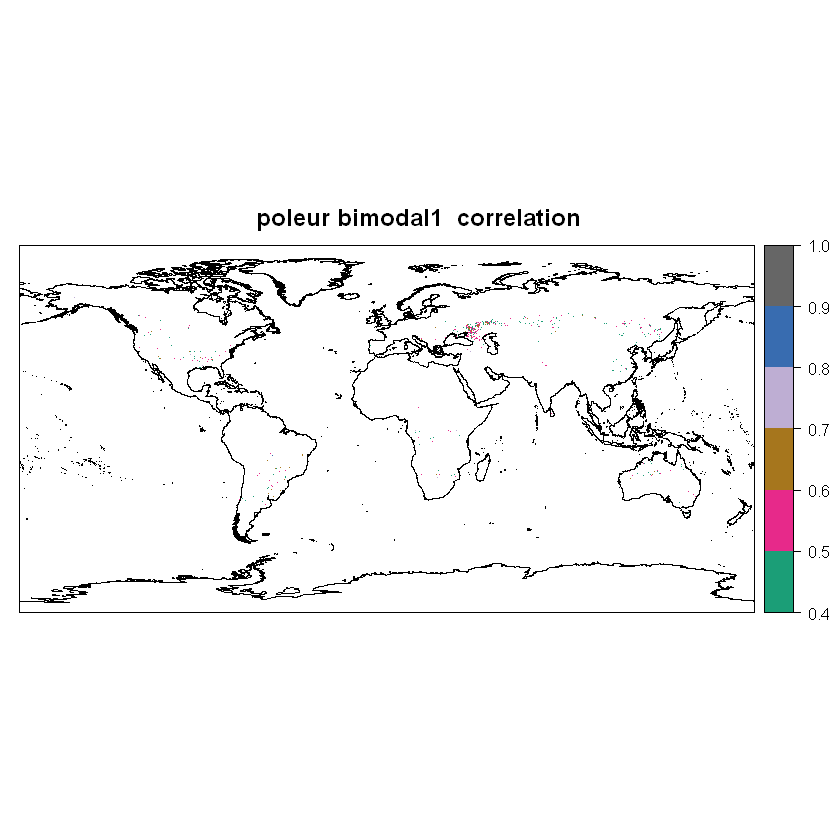

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

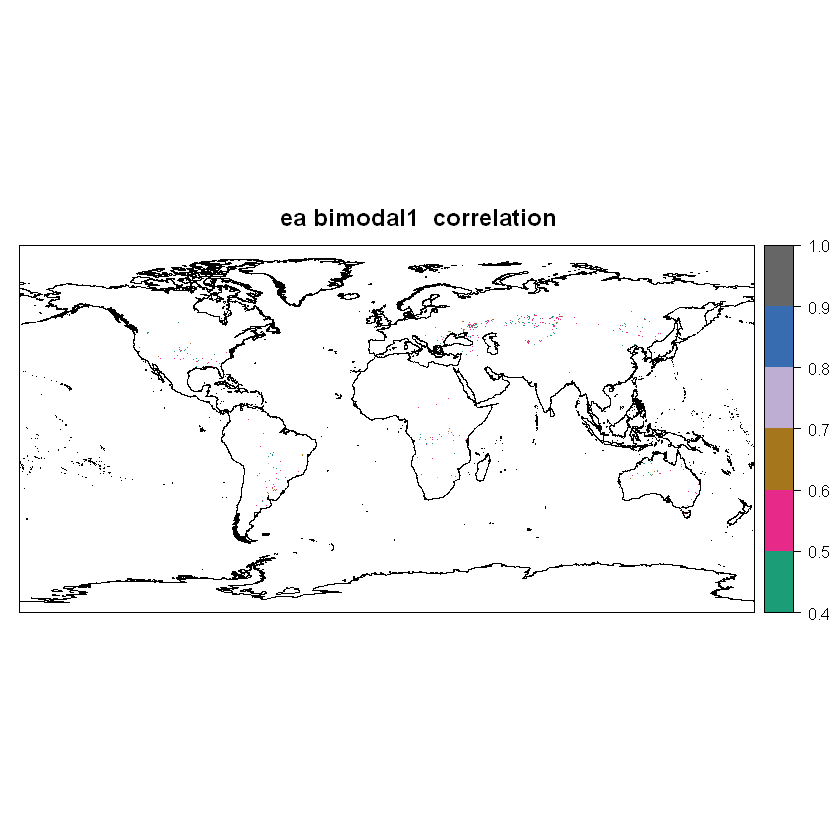

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

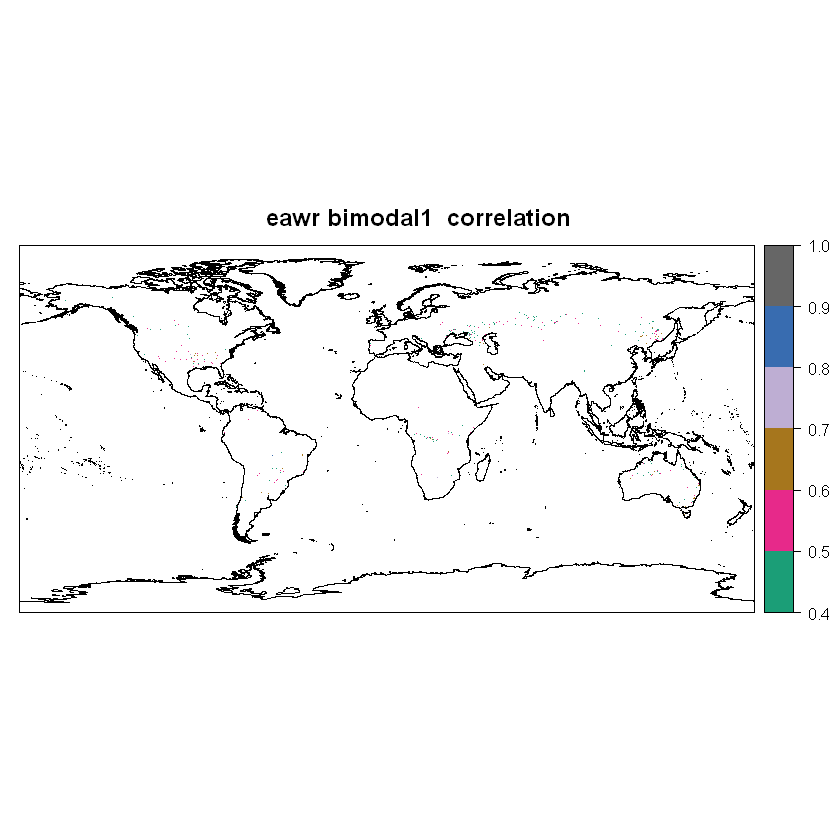

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

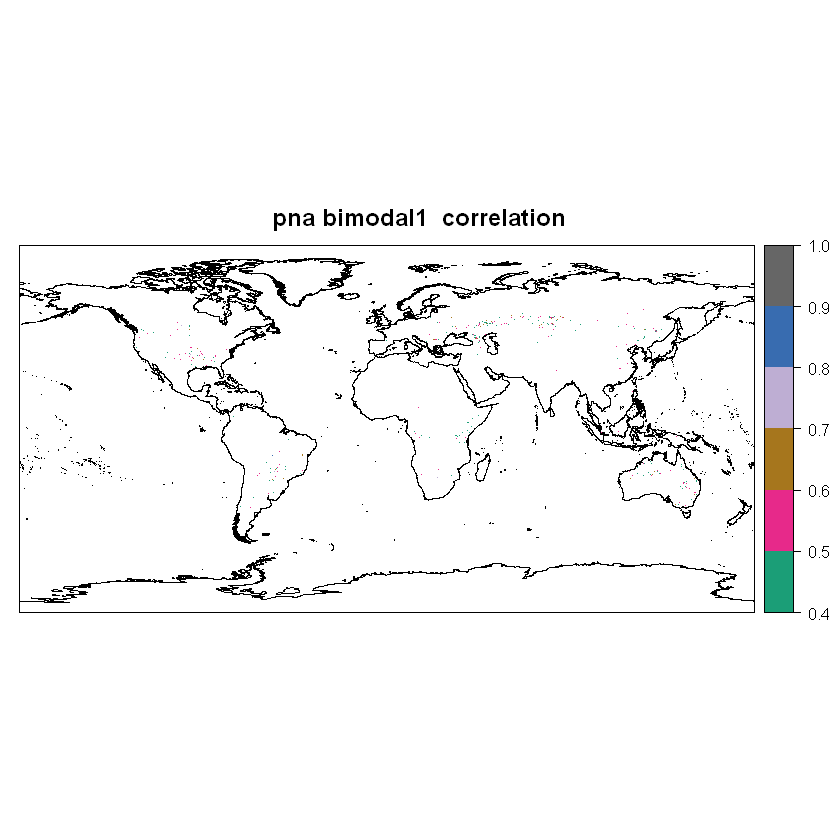

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

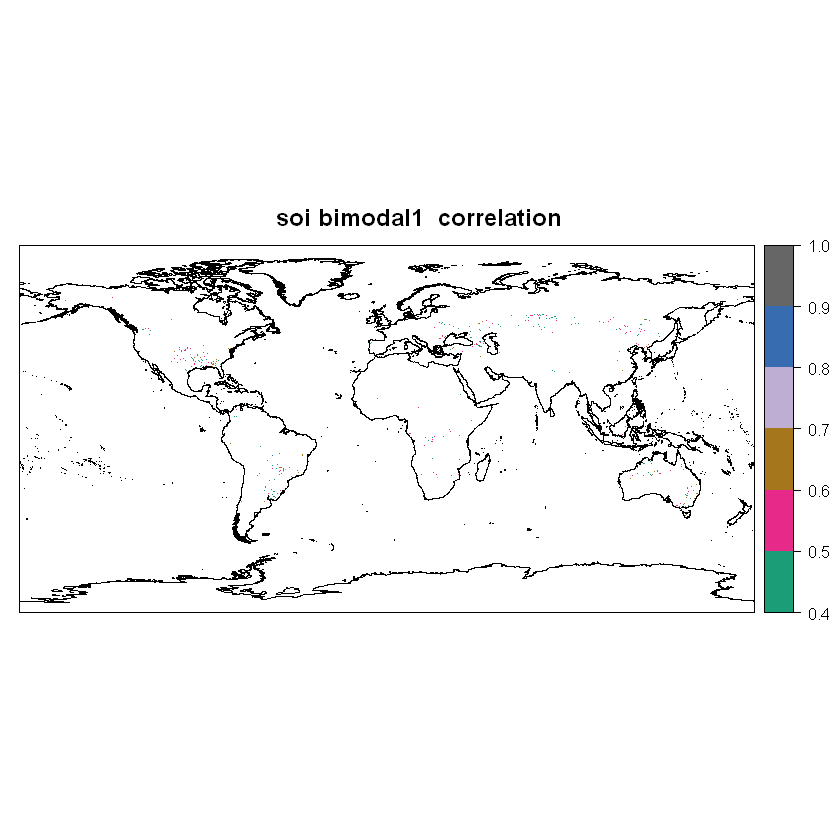

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

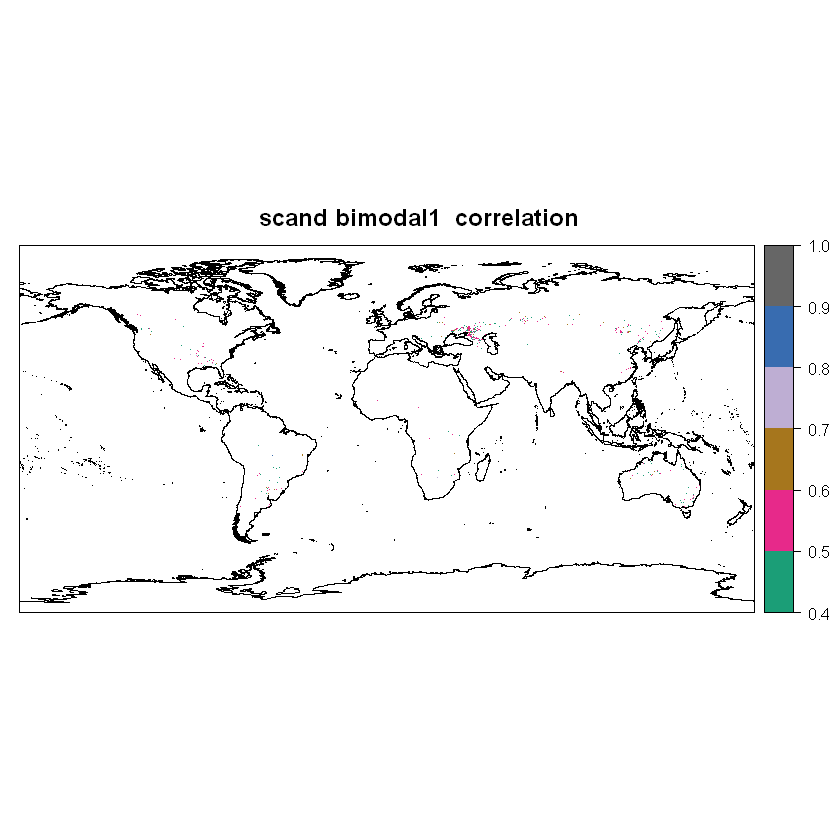

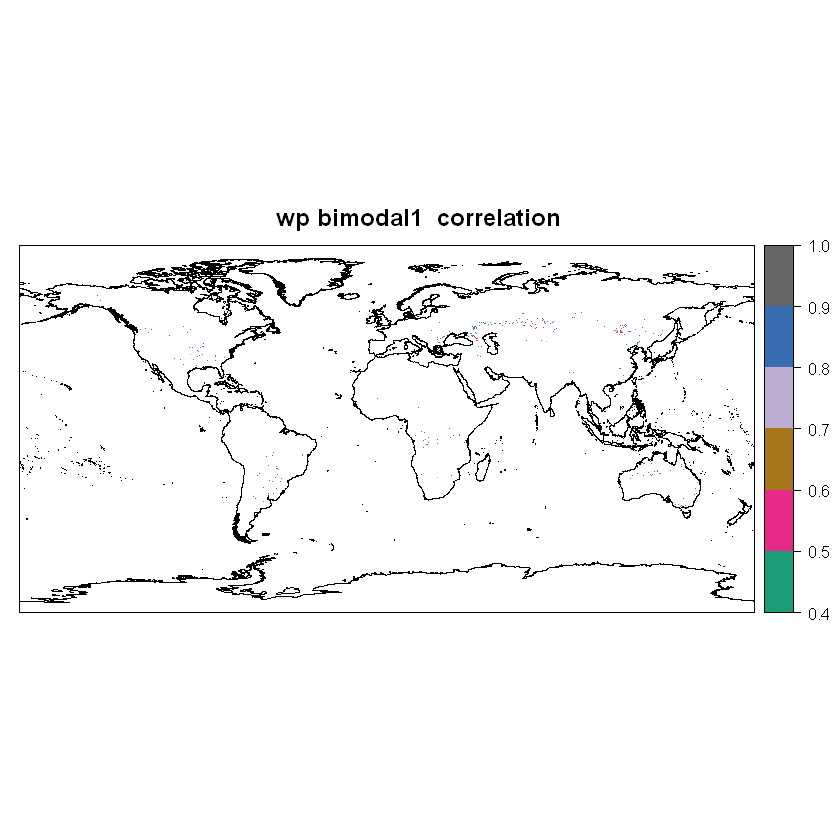

In [16]:
corr.df.2 = masked_coords
mode = 'bimodal1'
#corr.df.2 = corr.annual(nina34, 'nina34', corr.df.2, mode = mode)
#corr.df.2 = corr.annual(oni, 'oni', corr.df.2, mode = mode)
corr.df.2 = corr.annual(nao, 'nao', corr.df.2, mode = mode)
corr.df.2 = corr.annual(poleur, 'poleur', corr.df.2, mode = mode)
corr.df.2 = corr.annual(ea, 'ea', corr.df.2, mode = mode)
corr.df.2 = corr.annual(eawr, 'eawr', corr.df.2, mode = mode)
#corr.df.2 = corr.annual(epnp, 'epnp', corr.df.2, mode = mode)
corr.df.2 = corr.annual(pna, 'pna', corr.df.2, mode = mode)
corr.df.2 = corr.annual(soi, 'soi', corr.df.2, mode = mode)
corr.df.2 = corr.annual(scand, 'scand', corr.df.2, mode = mode)
corr.df.2 = corr.annual(wp, 'wp', corr.df.2, mode = mode)

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  2263 
Number of pixels correlated with more than  1  indexes  348 
Number of pixels correlated with more than  2  indexes  22 
Number of pixels correlated with more than  3  indexes  1 
Number of pixels correlated with more than  4  indexes  1 
Number of pixels correlated with more than  5  indexes  1 
Number of pixels correlated with more than  6  indexes  1 
Number of pixels correlated with more than  7  indexes  0 


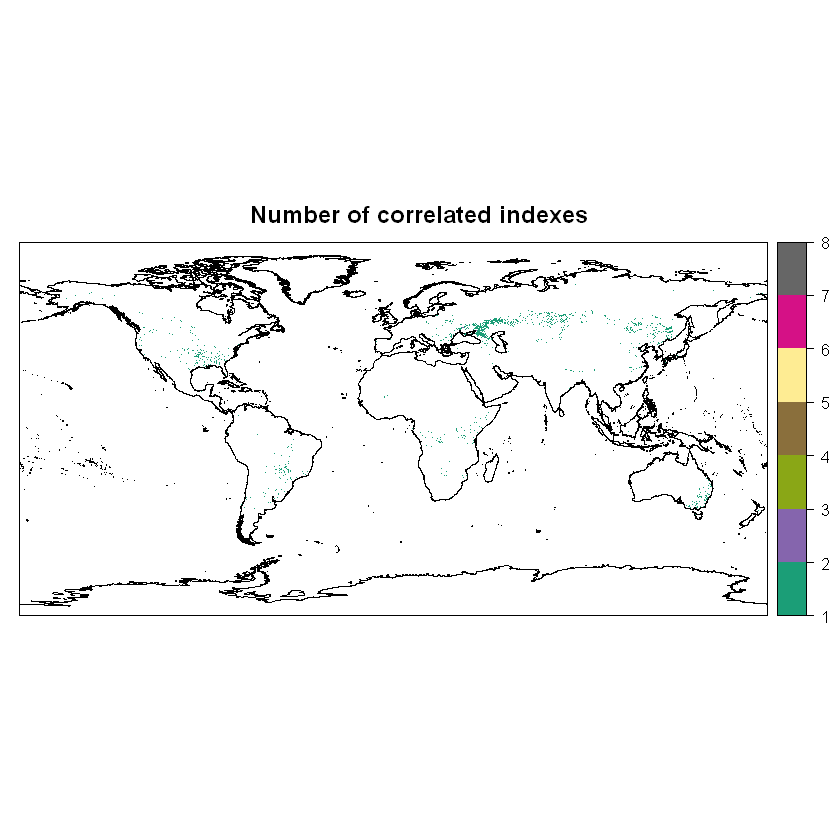

In [17]:
threshold = 0.4

arg.list <- list(col.regions = group.colors(8),
                          at = seq(1, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2$nao > threshold), as.numeric(corr.df.2$poleur > threshold), as.numeric(corr.df.2$ea > threshold),
          as.numeric(corr.df.2$eawr > threshold), as.numeric(corr.df.2$pna > threshold), as.numeric(corr.df.2$soi > threshold), 
          as.numeric(corr.df.2$scand > threshold), as.numeric(corr.df.2$wp > threshold))

corr.df.2$suma = rowSums(v, na.rm=T)
v <- corr.df.2$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, abs(v))
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df.2$suma > i-1), '\n')
}

## Monthly correlations for both unimodal and bimodal fire seasons

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

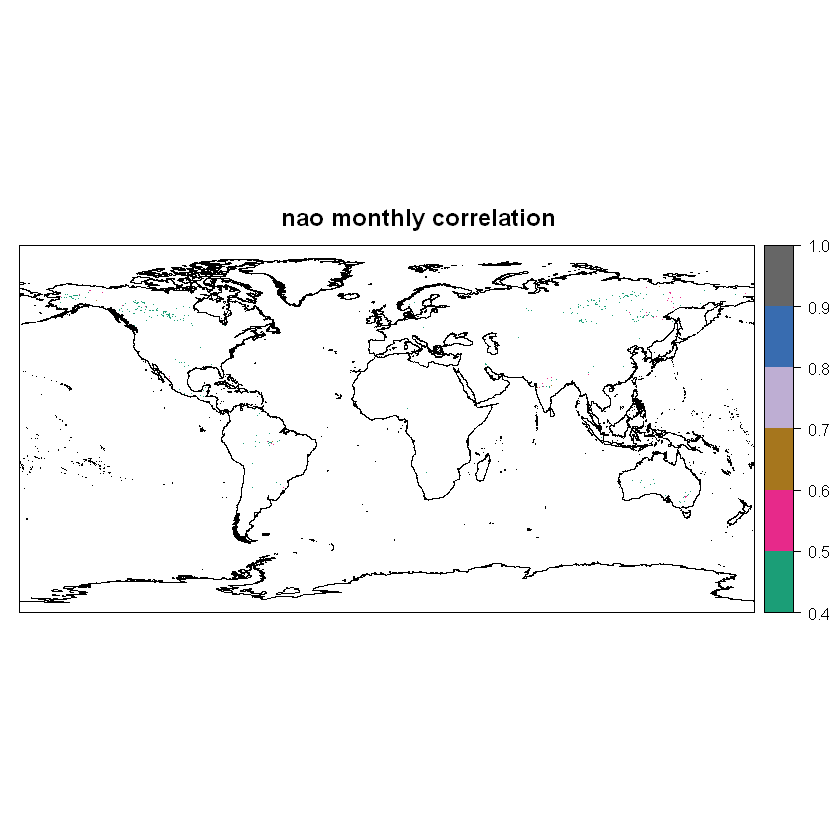

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

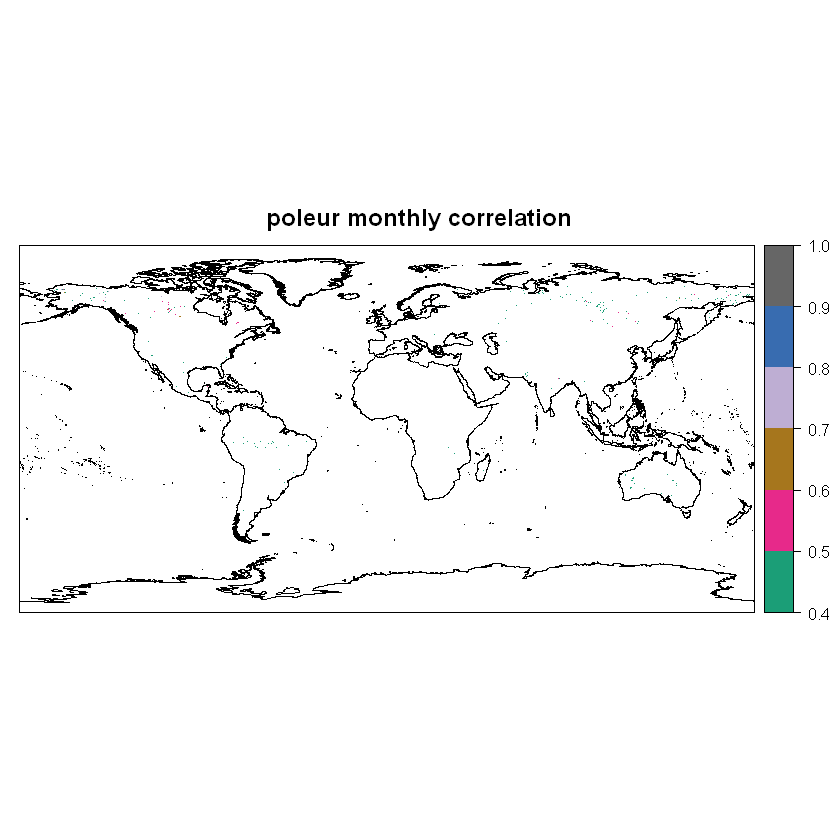

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

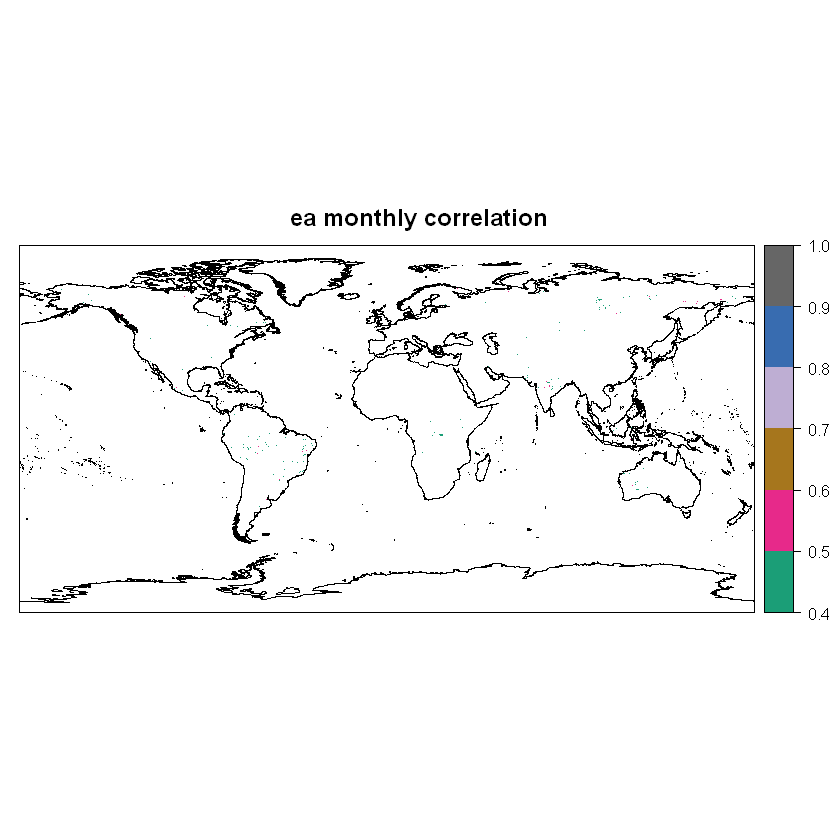

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

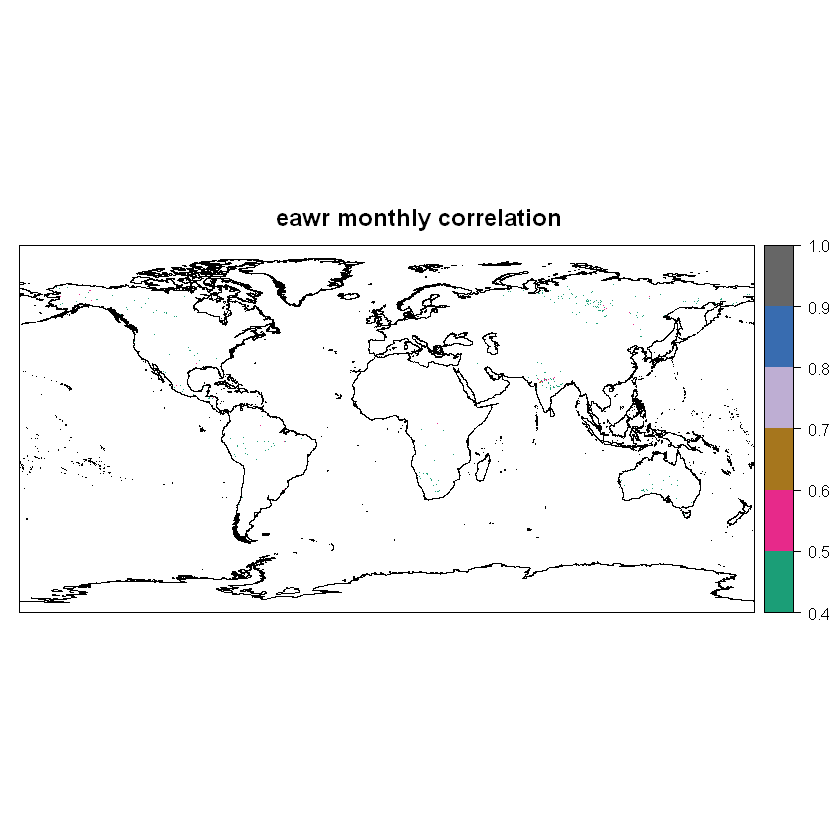

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

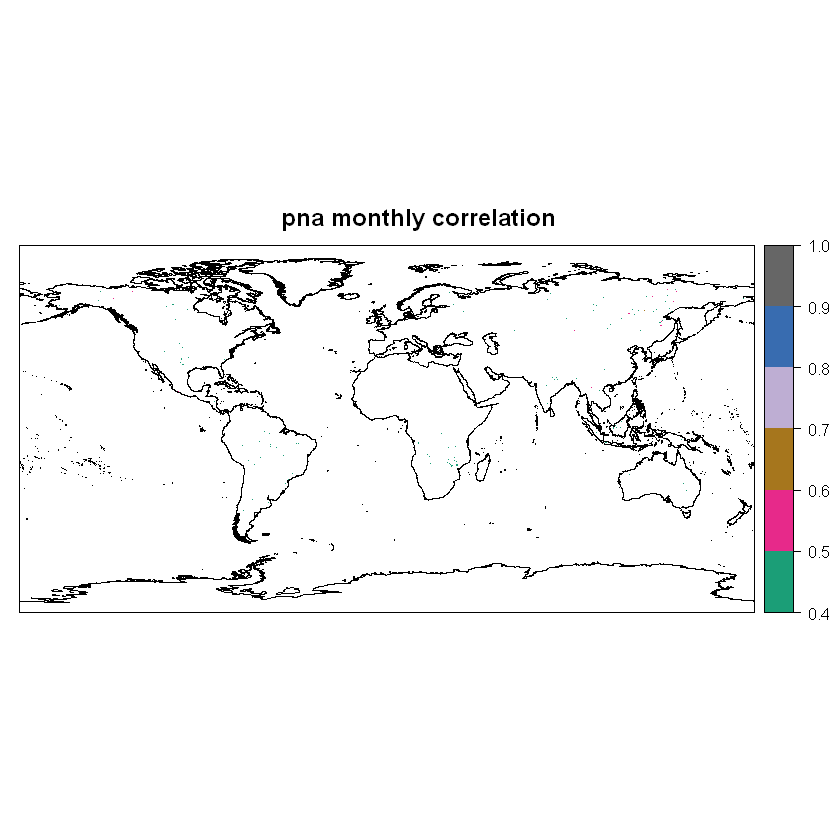

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

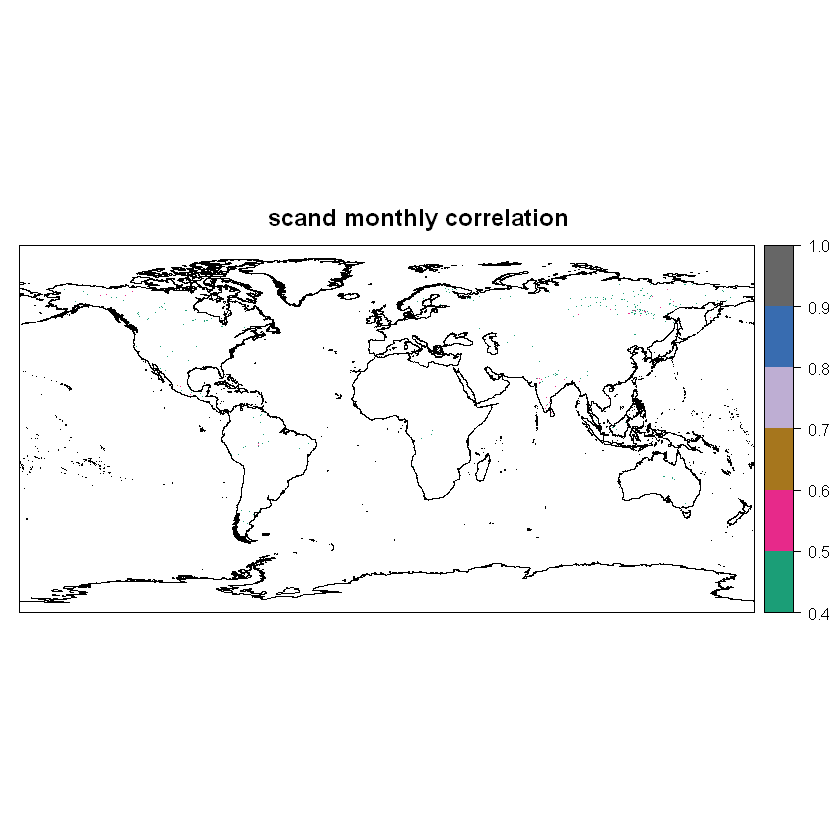

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

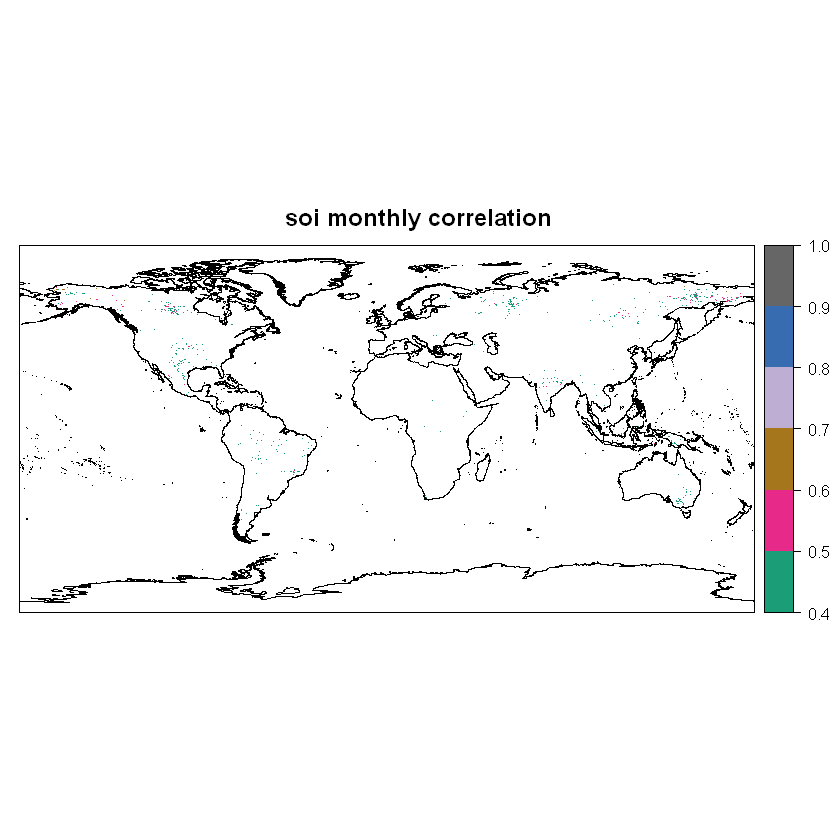

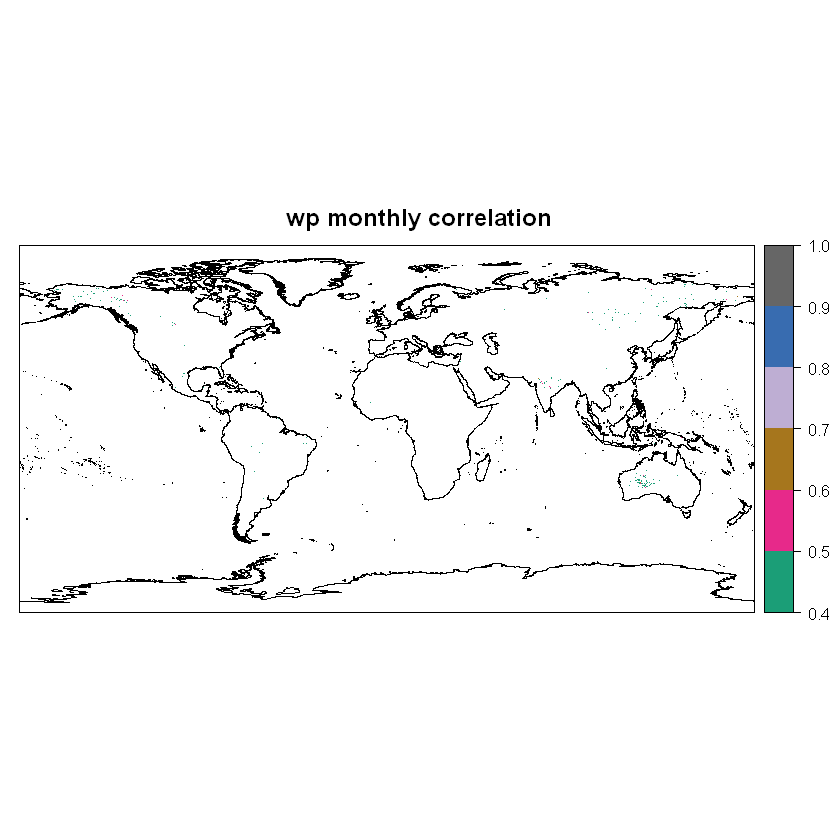

In [18]:
corr.df.monthly = masked_coords

#corr.df.monthly = corr.monthly(nina34, 'nina34', corr.df.monthly)
#corr.df.monthly = corr.monthly(oni, 'oni', corr.df.monthly)
corr.df.monthly = corr.monthly(nao, 'nao', corr.df.monthly)
corr.df.monthly = corr.monthly(poleur, 'poleur', corr.df.monthly)
corr.df.monthly = corr.monthly(ea, 'ea', corr.df.monthly)
corr.df.monthly = corr.monthly(eawr, 'eawr', corr.df.monthly)
#corr.df.monthly = corr.monthly(epnp, 'epnp', corr.df.monthly)
corr.df.monthly = corr.monthly(pna, 'pna', corr.df.monthly)
corr.df.monthly = corr.monthly(scand, 'scand', corr.df.monthly)
corr.df.monthly = corr.monthly(soi, 'soi', corr.df.monthly)
corr.df.monthly = corr.monthly(wp, 'wp', corr.df.monthly)

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  2753 
Number of pixels correlated with more than  1  indexes  108 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


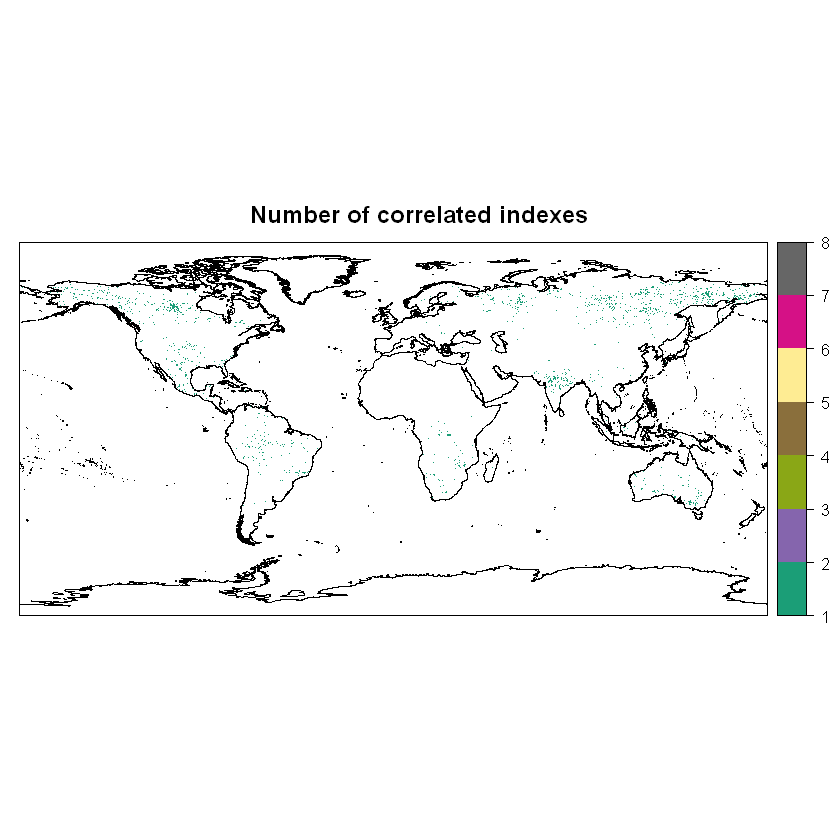

In [19]:
threshold = 0.4

arg.list <- list(col.regions = group.colors(8),
                          at = seq(1, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.monthly$nao > threshold), as.numeric(corr.df.monthly$poleur > threshold), as.numeric(corr.df.monthly$ea > threshold),
          as.numeric(corr.df.monthly$eawr > threshold), as.numeric(corr.df.monthly$pna > threshold), as.numeric(corr.df.monthly$soi > threshold), 
          as.numeric(corr.df.monthly$scand > threshold), as.numeric(corr.df.monthly$wp > threshold))

corr.df.monthly$suma = rowSums(v, na.rm=T)
v <- corr.df.monthly$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df.monthly$suma > i-1), '\n')
}